In [240]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import xlwings as xw
import numpy as np
import gc
import xlsxwriter as xlw

In [241]:
wb=xw.Book('Bhadravati_Chandrapur line.xlsx')

In [242]:
def sheet_creator(host_book,new_sheetname:str,after_sheet=None,before_sheet=None):
    host_book.sheets.add(name=new_sheetname,after=after_sheet,before=before_sheet)
    print(f'Sheet {new_sheetname} added.')
    
def value_adder(input_sheet,input_sheet_range:str,output_sheet_range,target_sheet):
    target_sheet.range(output_sheet_range).value=input_sheet.range(input_sheet_range).value
    print('Values addded and xlsheet is updated')
    

In [243]:
j=0
achar=65
bchar=66
for i in range(0,4):
    sheet_creator(host_book=wb,new_sheetname=f'Sheet for {chr(achar)} and {chr(bchar)}',after_sheet=wb.sheets[j])
    j+=1
    achar+=2
    bchar+=2
    

Sheet Sheet for A and B added.
Sheet Sheet for C and D added.
Sheet Sheet for E and F added.
Sheet Sheet for G and H added.


In [244]:
n=wb.sheets.count
n

5

In [245]:
achar=65
bchar=66
for i in range(1,n):
    value_adder(wb.sheets[0],input_sheet_range=f'{chr(achar)}:{chr(bchar)}',target_sheet=wb.sheets[i],output_sheet_range="A:B")
    achar+=2
    bchar+=2

Values addded and xlsheet is updated
Values addded and xlsheet is updated
Values addded and xlsheet is updated
Values addded and xlsheet is updated


### REGPLOT

In [246]:

def regplot_generator(df_new,a,b,chartname:str,number:int):
    image_got=sns.regplot(data=df_new,x=a,y=b,scatter_kws={'color':'blue'},line_kws={'color':'red'})
    plt.title(chartname)
    figg=image_got.get_figure()
    wb.sheets[number].pictures.add(figg,name=chartname, update=True)
    figg.clf()
    image_got.clear()
    del(image_got)
    del(figg)
    gc.collect()

In [247]:
v=[]
for i in range(1,n):
    df_new=wb.sheets[i].range("A:B").expand().options(pd.DataFrame,index=False,header=0).value
    df_new[2]=abs(df_new[0])
    df_new[3]=abs(df_new[1])
    df_new[4]=abs(df_new[2]-df_new[3])
    wb.sheets[i].range("C:E").value=df_new.iloc[:,2:5].values
    regplot_generator(df_new=df_new,a=df_new[0],b=df_new[1],chartname=f'CHART Before applying ABS sheet {i}',number=i)
    regplot_generator(df_new=df_new,a=df_new[2],b=df_new[3],chartname=f'CHART After Applying ABS Sheet{i}',number=i)
    regplot_generator(df_new=df_new,a=df_new[4].index,b=df_new[4],chartname=f'LOSS SCATTER PLOT-sheet {i}',number=i)
    v.append(df_new)
    del(df_new)
    gc.collect()


<Figure size 432x288 with 0 Axes>

### LINEPLOT

In [248]:
def lineplot_gen(df,x,y,chartname,color,num):
    image=sns.lineplot(data=df,x=x,y=y,color=color)
    plt.title(chartname)
    fige=image.get_figure()
    wb.sheets[num].pictures.add(fige,name=chartname,update=True)

In [249]:
len(v)

4

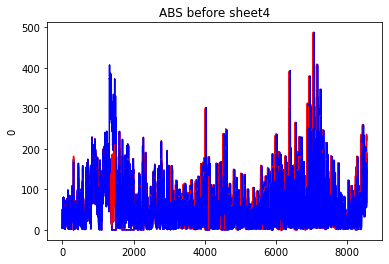

In [250]:
j=0
for i in range(1,len(v)+1):
    df_new=v[j]
    lineplot_gen(df=df_new,x=df_new[0].index,y=df_new[0],chartname=f'ABS before sheet{i}',color='r',num=i)
    lineplot_gen(df=df_new,x=df_new[1].index,y=df_new[1],chartname=f'ABS before sheet{i}',color='b',num=i)
    j+=1

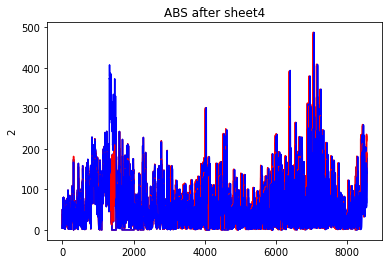

In [251]:
j=0
for i in range(1,len(v)+1):
    df_new=v[j]
    lineplot_gen(df=df_new,x=df_new[2].index,y=df_new[2],chartname=f'ABS after sheet{i}',color='r',num=i)
    lineplot_gen(df=df_new,x=df_new[3].index,y=df_new[3],chartname=f'ABS after sheet{i}',color='b',num=i)
    j+=1

# ERROR CORECCTION SHEET SPECIFIC

### FOR SHEET 1(A & B)

In [252]:
df_sheet1=v[0]

In [253]:
df_sheet1.iloc[3024:3050,:]

,0,1,2,3,4
3024,61.745461,33.745458,61.745461,33.745458,28.000003
3025,68.654552,9.381819,68.654552,9.381819,59.272733
3026,58.909097,4.727273,58.909097,4.727273,54.181824
3027,37.309095,4.072728,37.309095,4.072728,33.236367
3028,46.618186,8.436364,46.618186,8.436364,38.181822
3029,80.509099,10.763637,80.509099,10.763637,69.745462
3030,45.963641,7.709092,45.963641,7.709092,38.254549
3031,5.527273,10.981819,5.527273,10.981819,5.454546
3032,19.709093,14.036365,19.709093,14.036365,5.672728
3033,25.309093,5.890910,25.309093,5.890910,19.418184


In [254]:
df_sheet1[5]=df_sheet1[2]
df_sheet1[6]=df_sheet1[3]

In [255]:
df_sheet1[6].iloc[3024:] = df_sheet1[6].iloc[3024:].shift(-24)

In [256]:
df_sheet1[7]=abs(df_sheet1[5]-df_sheet1[6])

In [257]:
df_sheet1.iloc[3024:3050,:].head(5)

,0,1,2,3,4,5,6,7
3024,61.745461,33.745458,61.745461,33.745458,28.000003,61.745461,61.527279,0.218182
3025,68.654552,9.381819,68.654552,9.381819,59.272733,68.654552,68.363643,0.290909
3026,58.909097,4.727273,58.909097,4.727273,54.181824,58.909097,59.636370,0.727273
3027,37.309095,4.072728,37.309095,4.072728,33.236367,37.309095,37.818186,0.509091
3028,46.618186,8.436364,46.618186,8.436364,38.181822,46.618186,45.672732,0.945455


error from 3024 to 3050 removed and cells shifted upwards

In [258]:
regplot_generator(df_new=df_sheet1,a=df_sheet1[5],b=df_sheet1[6],chartname=f'AFTER REMOVING THE ERRORS THE CORR IS INCREASED',number=1)
regplot_generator(df_new=df_sheet1,a=df_sheet1[7].index,b=df_sheet1[7],chartname=f'AFTER REMOVING THE ERRORS Of the LOSS',number=1)

<Figure size 432x288 with 0 Axes>

In [259]:
v[0]=df_sheet1

### SHEET 2 (C & D)

In [260]:
df_sheet2=v[1]

In [261]:
df_sheet2.iloc[3024:3050,:]

,0,1,2,3,4
3024,60.654552,32.000003,60.654552,32.000003,28.654548
3025,67.345461,8.218183,67.345461,8.218183,59.127279
3026,57.309097,4.072728,57.309097,4.072728,53.236369
3027,36.290913,3.200000,36.290913,3.200000,33.090912
3028,46.254550,7.781819,46.254550,7.781819,38.472731
3029,79.490917,10.181819,79.490917,10.181819,69.309098
3030,45.163641,6.763637,45.163641,6.763637,38.400004
3031,6.909092,11.563638,6.909092,11.563638,4.654546
3032,17.600002,13.963638,17.600002,13.963638,3.636364
3033,25.963639,5.309091,25.963639,5.309091,20.654548


In [262]:
df_sheet2[5]=df_sheet2[2]
df_sheet2[6]=df_sheet2[3]
df_sheet2[6].iloc[3024:] = df_sheet2[6].iloc[3024:].shift(-24)
df_sheet2[7]=abs(df_sheet2[5]-df_sheet2[6])
df_sheet2.iloc[3024:3050,:].head(5)

,0,1,2,3,4,5,6,7
3024,60.654552,32.000003,60.654552,32.000003,28.654548,60.654552,60.581824,0.072727
3025,67.345461,8.218183,67.345461,8.218183,59.127279,67.345461,67.200007,0.145455
3026,57.309097,4.072728,57.309097,4.072728,53.236369,57.309097,57.890915,0.581818
3027,36.290913,3.200000,36.290913,3.200000,33.090912,36.290913,36.654549,0.363636
3028,46.254550,7.781819,46.254550,7.781819,38.472731,46.254550,45.672732,0.581818


In [263]:
regplot_generator(df_new=df_sheet2,a=df_sheet2[5],b=df_sheet2[6],chartname=f'AFTER REMOVING THE ERRORS THE CORR IS INCREASED',number=2)
regplot_generator(df_new=df_sheet2,a=df_sheet2[7].index,b=df_sheet2[7],chartname=f'AFTER REMOVING THE ERRORS Of the LOSS',number=2)

<Figure size 432x288 with 0 Axes>

In [264]:
v[1]=df_sheet2

### SHEET 3 (E & F)

In [265]:
df_sheet3=v[2]

In [266]:
len(df_sheet3)

8544

In [267]:
df_sheet3[df_sheet3[4]>7]

,0,1,2,3,4
1405,62.545461,53.454551,62.545461,53.454551,9.090910
1411,87.345463,79.636372,87.345463,79.636372,7.709092
1808,101.745465,110.109102,101.745465,110.109102,8.363637
2190,41.309095,25.090912,41.309095,25.090912,16.218183
2191,46.327277,27.563639,46.327277,27.563639,18.763638
...,...,...,...,...,...
8539,182.690927,143.345469,182.690927,143.345469,39.345458
8540,191.709110,145.745469,191.709110,145.745469,45.963641
8541,189.672746,142.690923,189.672746,142.690923,46.981823
8542,186.472746,140.000014,186.472746,140.000014,46.472732


In [268]:
df_sheet3.iloc[3024:3050,:]

,0,1,2,3,4
3024,51.781823,23.345457,51.781823,23.345457,28.436366
3025,57.600006,4.436364,57.600006,4.436364,53.163642
3026,51.927278,1.236364,51.927278,1.236364,50.690914
3027,33.454549,1.018182,33.454549,1.018182,32.436367
3028,37.963640,3.781819,37.963640,3.781819,34.181822
3029,64.581825,5.454546,64.581825,5.454546,59.127279
3030,44.800004,3.636364,44.800004,3.636364,41.163640
3031,8.509092,11.490910,8.509092,11.490910,2.981818
3032,13.600001,13.818183,13.600001,13.818183,0.218182
3033,19.127275,4.363637,19.127275,4.363637,14.763638


In [269]:
df_sheet3[5]=df_sheet3[2]
df_sheet3[6]=df_sheet3[3]
df_sheet3[6].iloc[3024:] = df_sheet3[6].iloc[3024:].shift(-24)


In [270]:
df_sheet3.drop(df_sheet3.index[2248:2343],inplace=True,axis=0)
df_sheet3=df_sheet3.reset_index()

In [271]:
df_sheet3[7]=abs(df_sheet3[5]-df_sheet3[6])

In [272]:
regplot_generator(df_new=df_sheet3,a=df_sheet3[5],b=df_sheet3[6],chartname=f'AFTER REMOVING THE ERRORS THE CORR IS INCREASED',number=3)
regplot_generator(df_new=df_sheet3,a=df_sheet3[7].index,b=df_sheet3[7],chartname=f'AFTER REMOVING THE ERRORS Of the LOSS',number=3)

<Figure size 432x288 with 0 Axes>

In [273]:
v[2]=df_sheet3

### SHEET 4 (G & H)

In [274]:
df_sheet4=v[3]

In [275]:
df_sheet4[df_sheet4[4]>6]

,0,1,2,3,4
491,34.981822,28.800003,34.981822,28.800003,6.181819
571,66.327279,72.509098,66.327279,72.509098,6.181819
809,64.727279,70.909098,64.727279,70.909098,6.181819
1320,81.527281,373.527310,81.527281,373.527310,292.000029
1321,86.618190,365.745491,86.618190,365.745491,279.127301
...,...,...,...,...,...
8539,180.218200,142.400014,180.218200,142.400014,37.818186
8540,189.600019,144.727287,189.600019,144.727287,44.872732
8541,187.127291,141.309105,187.127291,141.309105,45.818186
8542,184.072746,139.200014,184.072746,139.200014,44.872732


In [276]:
df_sheet4.iloc[3024:3050,:]

,0,1,2,3,4
3024,52.000005,23.054548,52.000005,23.054548,28.945457
3025,57.818188,4.145455,57.818188,4.145455,53.672733
3026,51.927278,1.309091,51.927278,1.309091,50.618187
3027,33.600003,1.018182,33.600003,1.018182,32.581821
3028,38.327277,4.000000,38.327277,4.000000,34.327276
3029,65.236370,5.600001,65.236370,5.600001,59.636370
3030,44.872732,3.418182,44.872732,3.418182,41.454550
3031,8.727274,12.145456,8.727274,12.145456,3.418182
3032,13.527274,14.254547,13.527274,14.254547,0.727273
3033,19.345456,4.218182,19.345456,4.218182,15.127274


In [277]:
df_sheet4[5]=df_sheet4[2]
df_sheet4[6]=df_sheet4[3]
df_sheet4[6].iloc[3024:] = df_sheet4[6].iloc[3024:].shift(-24)
df_sheet4.iloc[3024:,:].head(25)

,0,1,2,3,4,5,6
3024,52.000005,23.054548,52.000005,23.054548,28.945457,52.000005,52.581823
3025,57.818188,4.145455,57.818188,4.145455,53.672733,57.818188,58.472733
3026,51.927278,1.309091,51.927278,1.309091,50.618187,51.927278,50.327278
3027,33.600003,1.018182,33.600003,1.018182,32.581821,33.600003,32.654549
3028,38.327277,4.000000,38.327277,4.000000,34.327276,38.327277,40.509095
3029,65.236370,5.600001,65.236370,5.600001,59.636370,65.236370,67.563643
3030,44.872732,3.418182,44.872732,3.418182,41.454550,44.872732,39.345458
3031,8.727274,12.145456,8.727274,12.145456,3.418182,8.727274,7.054546
3032,13.527274,14.254547,13.527274,14.254547,0.727273,13.527274,12.800001
3033,19.345456,4.218182,19.345456,4.218182,15.127274,19.345456,21.309093


In [278]:
df_sheet4.drop(df_sheet4.index[1321:1514],inplace=True,axis=0)
df_sheet4=df_sheet4.reset_index()

In [279]:
df_sheet4[7]=abs(df_sheet4[5]-df_sheet4[6])

In [280]:
regplot_generator(df_new=df_sheet4,a=df_sheet4[5],b=df_sheet4[6],chartname=f'AFTER REMOVING THE ERRORS THE CORR IS INCREASED',number=4)
regplot_generator(df_new=df_sheet4,a=df_sheet4[7].index,b=df_sheet4[7],chartname=f'AFTER REMOVING THE ERRORS Of the LOSS',number=4)

<Figure size 432x288 with 0 Axes>

In [281]:
v[3]=df_sheet4

# ERROR REMOVAL DONE

### Dataframe To Xlsx Adder

In [282]:
def dftoxlsx(df,num,rangeinsheet:str,dfstart,dfend):
    wb.sheets[num].range(rangeinsheet).value=df.iloc[:,dfstart:dfend].values

In [283]:
j=1
for i in range(0,len(v)):
    dftoxlsx(df=v[i],rangeinsheet='F:H',dfstart=5,dfend=8,num=j)
    j+=1

### FINAL LINE PLOT (ERROR LESS ONE)

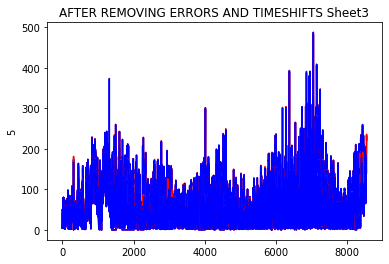

In [284]:
j=1
for i in range(0,len(v)):
    lineplot_gen(df=v[i],x=v[i][5].index,y=v[i][5],chartname=f'AFTER REMOVING ERRORS AND TIMESHIFTS Sheet{i}',color='r',num=j)
    lineplot_gen(df=v[i],x=v[i][6].index,y=v[i][6],chartname=f'AFTER REMOVING ERRORS AND TIMESHIFTS Sheet{i}',color='b',num=j)
    j+=1

# END